# k-Nearest Neighbours
##### If you want to annoy your neighbours, tell the truth about them. -Pietro Aretino

In [ ]:
%%capture
# To suppress the output when calling other files
%run MachineLearning.ipynb

### The Model

In [100]:
def raw_majority_vote(labels):
    votes     = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners          = len([count 
                                for count in vote_counts.values()
                               if count == winner_count])
    if num_winners == 1: 
        return winner # unique winner
    else:
        return majority_vote(labels[:-1]) # try again without the farthest
    
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point,label)"""
    
    # order the labeled points from nearest to farthest
    distance_fn = lambda lp: distance(lp[0], new_point)
    by_distance = sorted(labeled_points,
                        key=distance_fn)
    
    # find the labels for the k closest
    k_nearest_labels = [label for _,label in by_distance[:k]]
    
    # and let them vote
    return majority_vote(k_nearest_labels)

In [131]:
import re
import matplotlib.pyplot as plt

segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in list(zip(points, points[1:])):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

def plot_state_borders(segments=segments,color='0.5'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)
        

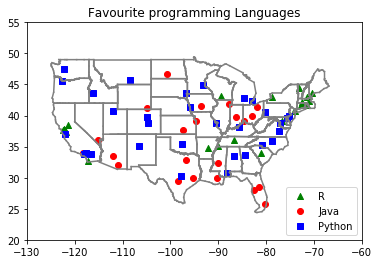

In [135]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

# we'd like to first plot this data. key is language and value is pair (lat,long)
# we can also directly plot by unpacking cities but it messes up legends, so accumulate data per language
plots = {"Java":([],[]), "Python":([],[]), "R":([],[])}
for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)
    
# we want each language to have a different marker and color
markers = {"Java":"o", "Python":"s", "R":"^"}
colors  = {"Java":"r", "Python":"b", "R":"g"}

# Create a scatter series for each language
def plot_languages_on_map(plots, markers=markers, colors=colors, map_color='0.5'):
    for language, (x,y) in plots.items():
        plt.scatter(x,y, color=colors[language], marker=markers[language],label=language, zorder=1)
    plot_state_borders(color=map_color)
    l = plt.legend(loc="lower right")
    l.set_zorder(3)            # zoder controls the priority of appearance, higher zorder appears on top 
    plt.axis([-130,-60,20,55]) # long,lat limits for USA
    plt.title("Favourite programming Languages")
    plt.show()


# plot_languages_on_map(plots)

1 neighbour(s) 40 correct out of 75
3 neighbour(s) 44 correct out of 75
5 neighbour(s) 41 correct out of 75
7 neighbour(s) 35 correct out of 75


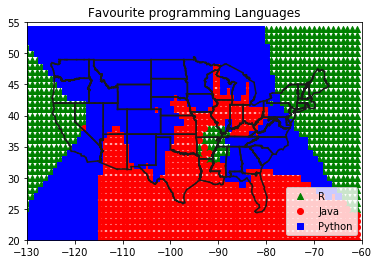

In [136]:
# try several different values of k
for k in [1,3,5,7]:
    num_correct =0
    for city in cities:
        location, actual_language = city
        other_cities = [other_city
                       for other_city in cities
                       if other_city != city]
        predicted_language = knn_classify(k, other_cities, location)
        if predicted_language == actual_language:
            num_correct += 1
    print(k, "neighbour(s)", num_correct, "correct out of", len(cities))
    
# now we can look at what regions would get classified to which language, by classifying an entire grid of points

plots = {"Java":([],[]), "Python":([],[]), "R":([],[])}

k = 5
for longitude in range(-130,-60):
    for latitude in range(20,55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)
        
# plot_languages_on_map(plots,map_color="0.1")

### The Curse of Dimensionality
kNN runs into trouble in higher dimensions because high dimensional spaces are vast. Points in high dimensional spaces tend not to be close to one another at all. This means that every extra dimension - even if just noise - is another opportunity for each point to be further away from every other point. <br/>
This means it's worth considering dimensionality reduction of some sort when trying to apply kNN

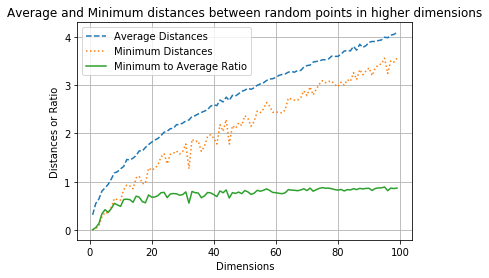

In [147]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

dimensions = [i for i in range(1,100)]

avg_distances = []
min_distances = []

random.seed(0)
for dim in dimensions:
    distances = random_distances(dim, 100) # 100 random pairs
    avg_distances.append(mean(distances))
    min_distances.append(min(distances))
    
min_to_avg_ratio = [min_i/avg_i for min_i,avg_i in zip(min_distances, avg_distances)]

plt.plot(dimensions, avg_distances,"--",label="Average Distances")
plt.plot(dimensions, min_distances,":",label="Minimum Distances")
plt.plot(dimensions, min_to_avg_ratio,"-",label="Minimum to Average Ratio")
plt.title("Average and Minimum distances between random points in higher dimensions")
plt.xlabel("Dimensions")
plt.ylabel("Distances or Ratio")
plt.legend(loc="upper left")
plt.grid()
plt.show()
